In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "WHR2024.csv"
data = pd.read_csv(file_path)
data.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298


In [6]:
# Inspect column names
print("Dataset columns:", data.columns)

Dataset columns: Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                143 non-null    object 
 1   Ladder score                                143 non-null    float64
 2   upperwhisker                                143 non-null    float64
 3   lowerwhisker                                143 non-null    float64
 4   Explained by: Log GDP per capita            140 non-null    float64
 5   Explained by: Social support                140 non-null    float64
 6   Explained by: Healthy life expectancy       140 non-null    float64
 7   Explained by: Freedom to make life choices  140 non-null    float64
 8   Explained by: Generosity                    140 non-null    float64
 9   Explained by: Perceptions of corruption     140 non-null    float64
 10  Dystopia + res

In [8]:
# Update column selection based on actual column names in the dataset
selected_columns = ['Country name', 'Ladder score', 'Explained by: Log GDP per capita',
                    'Explained by: Social support', 'Explained by: Healthy life expectancy',
                    'Explained by: Freedom to make life choices', 'Explained by: Generosity',
                    'Explained by: Perceptions of corruption']
data = data[selected_columns]
data.dropna(inplace=True)

<ipython-input-8-a36fddcc4093>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [9]:
# Rename columns for easier reference
data.rename(columns={
    'Country name': 'Country',
    'Ladder score': 'Happiness_Score',
    'Explained by: Log GDP per capita': 'GDP_per_Capita',
    'Explained by: Social support': 'Social_Support',
    'Explained by: Healthy life expectancy': 'Healthy_Life_Expectancy',
    'Explained by: Freedom to make life choices': 'Freedom_to_Make_Life_Choices',
    'Explained by: Generosity': 'Generosity',
    'Explained by: Perceptions of corruption': 'Perceptions_of_Corruption'
}, inplace=True)

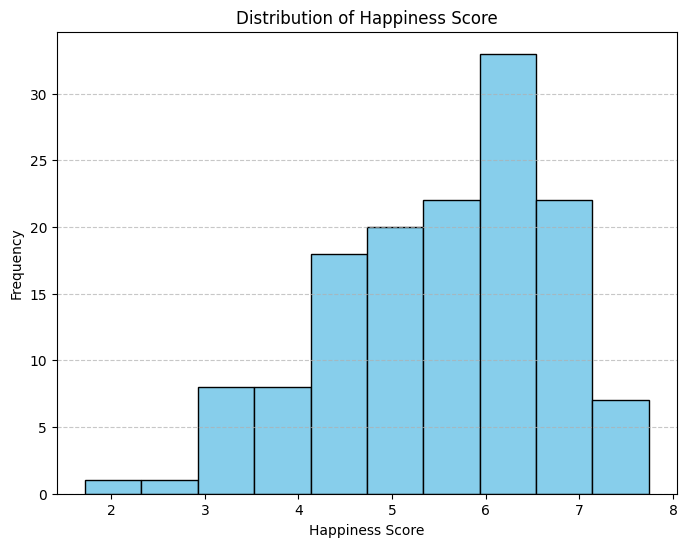

In [10]:
# Visualization: Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Happiness_Score'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

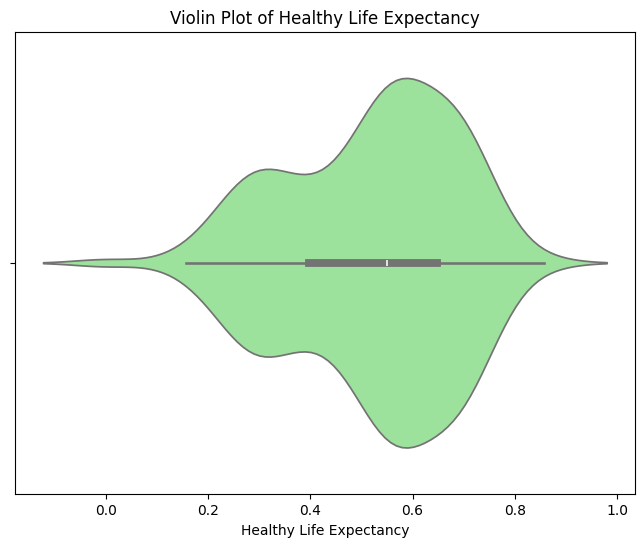

In [11]:
# Visualization: Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=data['Healthy_Life_Expectancy'], color='lightgreen')
plt.title("Violin Plot of Healthy Life Expectancy")
plt.xlabel("Healthy Life Expectancy")
plt.show()

In [12]:
# Linear Regression: GDP vs Happiness
X = data[['GDP_per_Capita']].values
y = data['Happiness_Score'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

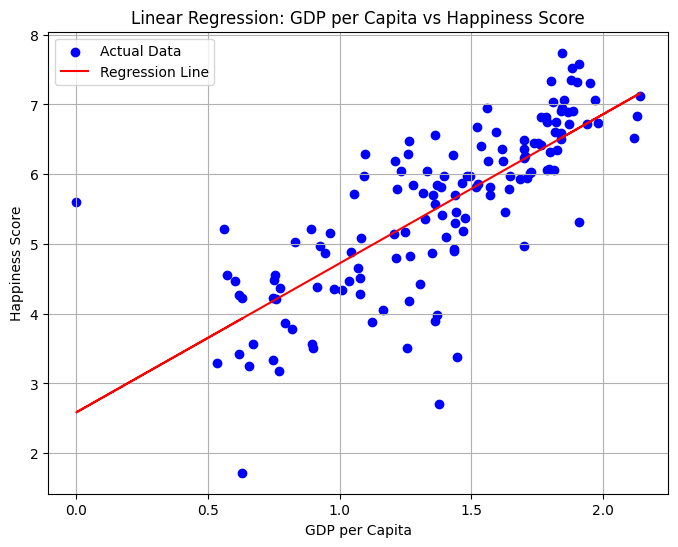

Mean Squared Error: 0.57


In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title("Linear Regression: GDP per Capita vs Happiness Score")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend()
plt.grid(True)
plt.show()

print(f"Mean Squared Error: {mse:.2f}")

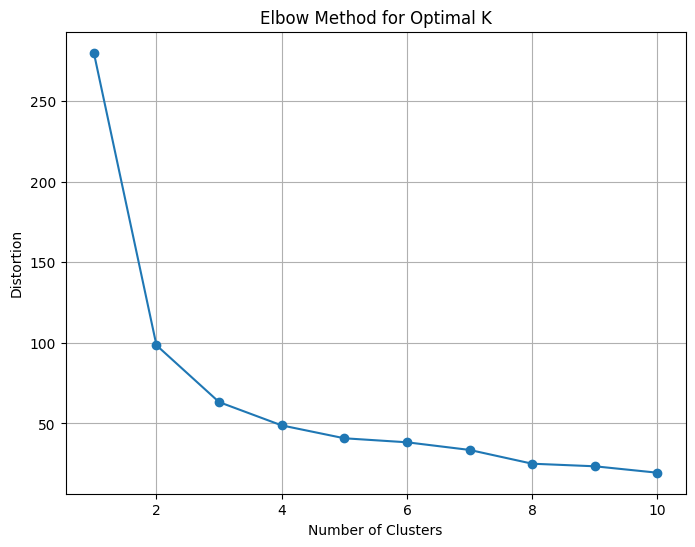

In [14]:
# Clustering: Elbow Method
features_to_cluster = ['GDP_per_Capita', 'Happiness_Score']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features_to_cluster])

distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.grid(True)
plt.show()

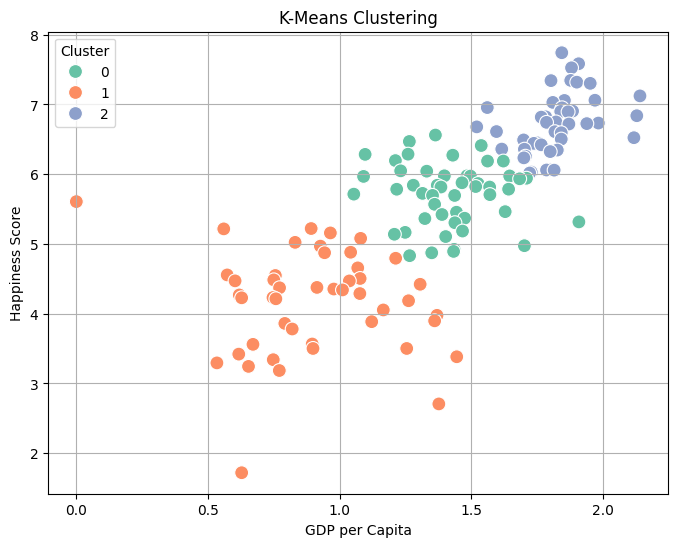

In [15]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x='GDP_per_Capita', y='Happiness_Score', hue='Cluster', data=data, palette='Set2', s=100)
plt.title("K-Means Clustering")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
